In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

Steps according to the CRISP-DM process:

## 1.	Business understanding

### What does the business need?

Insight into the factors that drive the earnings of the companies in the FTSE 350 Metal and Mining

## 2.  Data understanding

What data do we have?

Table showing economic events in the past 6 years.

In [2]:
original_data = pd.read_csv('../../Notebooks/Datasets/Economic_dataset/Economic_Events.csv')
original_data

,Date Time,Unnamed: 1,Unnamed: 2,Unnamed: 3,Event
0,01/07/2016 19:01,UK,1),NaN,"Jonathan Hill meets with Jon Cunliffe, Deputy ..."
1,01/08/2016,UK,2),NaN,United Kingdom Sovereign Debt to Be Rated by DBRS
2,01/12/2016 09:15,UK,3),NaN,Mark Carney speaks in Paris
3,01/12/2016 11:00,UK,4),NaN,"Cameron Questioned by Commons Panel on Syria, ..."
4,01/14/2016 05:30,UK,5),NaN,Andrew Bailey Speaks on Green Finance at Mansi...
...,...,...,...,...,...
775,11/30/2021 08:00,UK,776),NaN,BOE's Mann speaks at event with Barclays
776,12/01/2021 09:00,UK,777),NaN,BOE's Bailey speaks on insurance regulation
777,12/03/2021 06:00,UK,778),NaN,BOE's Saunders speaks.
778,12/10/2021,UK,779),NaN,United Kingdom Sovereign Debt to be rated by F...


## Data Wrangling

In [3]:
clean_data = original_data.drop(labels = ['Unnamed: 2', 'Unnamed: 3'], axis = 1)
clean_data

,Date Time,Unnamed: 1,Event
0,01/07/2016 19:01,UK,"Jonathan Hill meets with Jon Cunliffe, Deputy ..."
1,01/08/2016,UK,United Kingdom Sovereign Debt to Be Rated by DBRS
2,01/12/2016 09:15,UK,Mark Carney speaks in Paris
3,01/12/2016 11:00,UK,"Cameron Questioned by Commons Panel on Syria, ..."
4,01/14/2016 05:30,UK,Andrew Bailey Speaks on Green Finance at Mansi...
...,...,...,...
775,11/30/2021 08:00,UK,BOE's Mann speaks at event with Barclays
776,12/01/2021 09:00,UK,BOE's Bailey speaks on insurance regulation
777,12/03/2021 06:00,UK,BOE's Saunders speaks.
778,12/10/2021,UK,United Kingdom Sovereign Debt to be rated by F...


Some formats of Date Time are not correct:

Column Date Time needs to be formatted correctly

Below is converting date times from string to datetime format

In [4]:
count = 0
for i in range(len(clean_data)):
    try:
        clean_data['Date Time'][i] = pd.to_datetime(clean_data['Date Time'][i])
    except ValueError:
        count += 1
print(count)

24


Below are cells which are not formatted properly - mostly indicating when the event finished

In [5]:
clean_data[clean_data['Date Time'].apply(lambda x: isinstance(x, str))]

,Date Time,Unnamed: 1,Event
8,01/25/2016 01/26,UK,Middle East & North Africa Energy Conference H...
67,05/11/2016 05/12,UK,EBRD Annual Meeting
75,05/20/2016 05/21,GE,"G-7 Finance Ministers, Central Bank Governors ..."
103,07/08/2016 07/11,CH,G-20 Trade Ministers Meet in Shanghai
104,07/11/2016 07/17,UK,Farnborough International Airshow Features F-35
125,09/03/2016 09/05,CH,"G-20 Leaders Meet in Hangzhou, China"
152,10/18/2016 10/19,UK,Saudi Oil Minister to Attend Oil & Money Confe...
173,11/17/2016 11/19,GE,"Valls, Sturgeon, Schaeuble at Economic Confere..."
174,11/17/2016 11/18,US,President Obama Meets With Chancellor Merkel a...
195,01/13/2017 01/18,US,"Secretary Kerry Travels to Vietnam, France, U...."


In [6]:
clean_data[clean_data['Date Time'].apply(lambda x: isinstance(x, datetime))]

,Date Time,Unnamed: 1,Event
0,2016-01-07 19:01:00,UK,"Jonathan Hill meets with Jon Cunliffe, Deputy ..."
1,2016-01-08 00:00:00,UK,United Kingdom Sovereign Debt to Be Rated by DBRS
2,2016-01-12 09:15:00,UK,Mark Carney speaks in Paris
3,2016-01-12 11:00:00,UK,"Cameron Questioned by Commons Panel on Syria, ..."
4,2016-01-14 05:30:00,UK,Andrew Bailey Speaks on Green Finance at Mansi...
...,...,...,...
775,2021-11-30 08:00:00,UK,BOE's Mann speaks at event with Barclays
776,2021-12-01 09:00:00,UK,BOE's Bailey speaks on insurance regulation
777,2021-12-03 06:00:00,UK,BOE's Saunders speaks.
778,2021-12-10 00:00:00,UK,United Kingdom Sovereign Debt to be rated by F...


### Plotting inflation - how to combine with Economic Events?

In [7]:
inflation_df = pd.read_csv('../../Notebooks/Datasets/Economic_dataset/Inflation.csv')
inflation_df

,Date,Inflation Rate
0,31/12/2021,5.4
1,30/11/2021,5.1
2,31/10/2021,4.2
3,30/09/2021,3.1
4,31/08/2021,3.2
...,...,...
358,29/02/1992,6.9
359,31/01/1992,7.0
360,31/12/1991,7.2
361,30/11/1991,7.1


In [8]:
def format_date(df, column_name):
    err = 0
    for i in range(len(df)):
        try:
            df[column_name][i] = pd.to_datetime(df[column_name][i])
        except ValueError:
            err += 1
    return err

In [9]:
format_date(inflation_df, 'Date')

C:\Users\vojno\AppData\Local\Temp/ipykernel_15592/1607507911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][i] = pd.to_datetime(df[column_name][i])


0

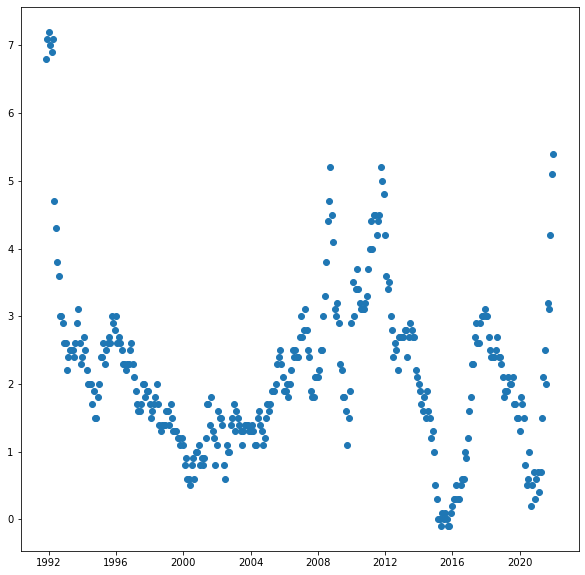

In [10]:
fig, ax = plt.subplots(figsize = (10, 10))

dates = matplotlib.dates.date2num(inflation_df['Date'])
ax.plot_date(dates, inflation_df['Inflation Rate'])
plt.show()